#### Import libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [7, 5]
#pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 100)

#### Import dataset

In [2]:
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_df.shape

(9240, 37)

In [4]:
leads_df['Prospect ID'].nunique()

9240

In [5]:
leads_df['Lead Number'].nunique()

9240

#### Dropping ProspectID since Lead Number is also unique

In [6]:
leads_df.drop(['Prospect ID'],axis=1,inplace=True)

In [7]:
leads_df.shape

(9240, 36)

#### Replacing 'Select' as 'NaN' in columns since that is a missing value

In [8]:
leads_df = leads_df.replace('Select', np.nan)
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

#### checking for columns with null values above 40% to drop

In [11]:
null_in_leads = round(leads_df.isnull().sum()*100/len(leads_df),2)
null_in_leads.sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

In [12]:
for c in leads_df.columns:
    if ((leads_df[c].isnull().sum()/len(leads_df)*100)>=40):
        leads_df.drop(c, axis=1,inplace=True)

In [13]:
leads_df.shape

(9240, 29)

In [14]:
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [15]:
null_in_leads = round(leads_df.isnull().sum()*100/len(leads_df),2)
null_in_leads.sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Number                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Search    

In [16]:
leads_df.isnull().sum().sort_values(ascending=False)

City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Lead Number                                         0
Digital Advertisement                               0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations                             0
Search                      

In [17]:
leads_df.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
leads_df.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

#### since most data is from Maharashtra and India we can drop the City & Country columns

In [19]:
leads_df.drop('Country',axis=1,inplace=True)
leads_df.drop('City',axis=1,inplace=True)
leads_df.shape

(9240, 27)

In [20]:
leads_df.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [21]:
leads_df['Tags'] = leads_df['Tags'].replace(np.nan,'Not Specified')
leads_df.Tags.value_counts(dropna=False)

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [22]:
leads_df.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [23]:
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan,'Not Specified')
leads_df.Specialization.value_counts(dropna=False)

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
leads_df.loc[leads_df['Specialization'].str.contains('Management'), 'Specialization'] = 'Management Studies'
leads_df.loc[leads_df['Specialization'].str.contains('Business',case=False), 'Specialization'] = 'Business Studies'
leads_df.Specialization.value_counts(dropna=False)

Management Studies                   4253
Not Specified                        3380
Business Studies                      711
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
E-COMMERCE                            112
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
leads_df.drop('What matters most to you in choosing a course',axis=1,inplace=True)
leads_df.shape

(9240, 26)

In [27]:
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan,'Not Specified')
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Not Specified           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
leads_df.isnull().sum().sort_values(ascending=False)

TotalVisits                                 137
Page Views Per Visit                        137
Last Activity                               103
Lead Source                                  36
Lead Number                                   0
X Education Forums                            0
A free copy of Mastering The Interview        0
I agree to pay the amount through cheque      0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Tags                                          0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper                                     0
Magazine                                      0
Newspaper Article                             0
Lead Origin                                   0
Search                                        0
What is your current occupation               0
Specialization                          

In [30]:
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Studies,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


### checking data imbalance

In [31]:
leads_df.Converted.value_counts(normalize=True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

#### Converted does not look too imbalanced

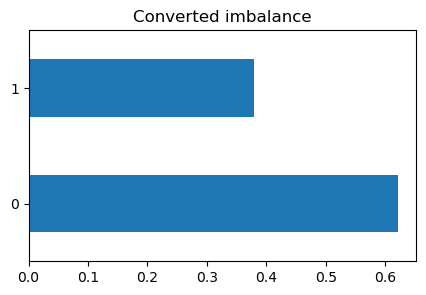

In [158]:
plt.figure(figsize=[5,3])
leads_df.Converted.value_counts(normalize=True).plot.barh()
plt.title('Converted imbalance');

In [33]:
def countplot(x, fig):
    plt.subplot(3,3, fig)
    sns.countplot(leads_df[x])
    plt.xlabel(x,size = 9)
    plt.xticks(rotation = 60)

plt.figure(figsize=(100,100))

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

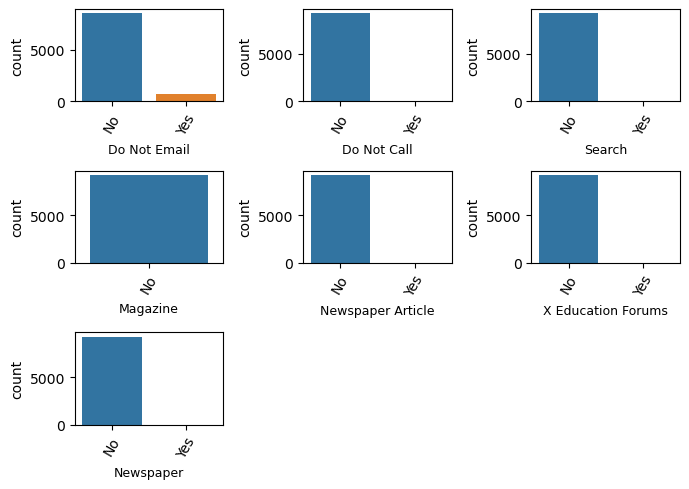

In [34]:
countplot('Do Not Email',1)
countplot('Do Not Call',2)
countplot('Search',3)
countplot('Magazine',4)
countplot('Newspaper Article',5)
countplot('X Education Forums',6)
countplot('Newspaper',7)

plt.tight_layout()

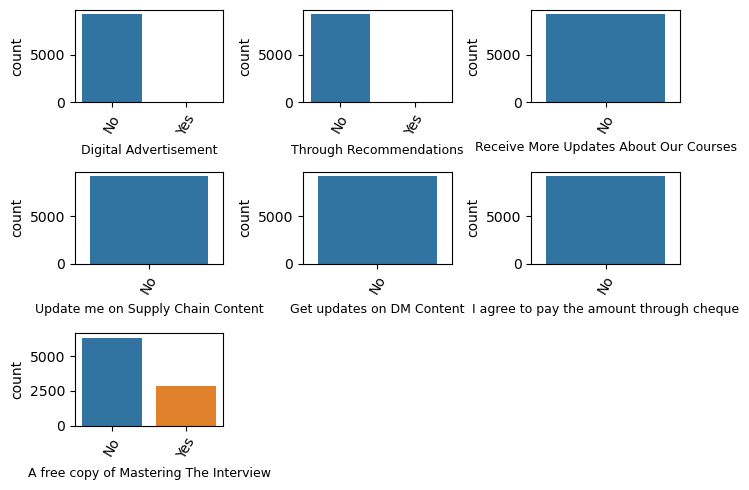

In [35]:
countplot('Digital Advertisement',1)
countplot('Through Recommendations',2)
countplot('Receive More Updates About Our Courses',3)
countplot('Update me on Supply Chain Content',4)
countplot('Get updates on DM Content',5)
countplot('I agree to pay the amount through cheque',6)
countplot('A free copy of Mastering The Interview',7)

plt.tight_layout()

#### We can drop all the above columns except for 'Do Not Email' & 'A free copy of Mastering The Interview' since they mostly contain No

In [36]:
leads_df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)
leads_df.shape

(9240, 14)

In [37]:
null_in_leads = round(leads_df.isnull().sum()*100/len(leads_df),2)
null_in_leads.sort_values(ascending=False)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Lead Number                               0.00
Lead Origin                               0.00
Do Not Email                              0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [38]:
leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [39]:
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Not Specified')
leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Not Specified          36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [40]:
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [41]:
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Not Specified')
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Not Specified                    103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [42]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


#### dropping nulls from TotalVisits & 'Page Views Per Visit'

In [43]:
leads_df = leads_df.dropna()
leads_df.shape

(9103, 14)

In [44]:
null_in_leads = round(leads_df.isnull().sum()*100/len(leads_df),2)
null_in_leads.sort_values(ascending=False)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [45]:
leads_df_1 = leads_df

leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Studies,Student,Will revert after reading the email,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,No,Modified


In [46]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
90%,650254.000000,1.000000,7.000000,1372.000000,5.000000
95%,655337.900000,1.000000,10.000000,1556.900000,6.000000
99%,659561.860000,1.000000,17.000000,1838.960000,9.000000


#### There seem to be outliers in TotalVisits & 'Page Views Per Visit'

In [47]:
#Removing >.99
TV_Q = leads_df.TotalVisits.quantile(0.99)
leads_df = leads_df[(leads_df.TotalVisits <= TV_Q)]
PVPV_Q = leads_df.TotalVisits.quantile(0.99)
leads_df = leads_df[(leads_df.TotalVisits <= PVPV_Q)]

In [48]:
leads_df.shape

(8929, 14)

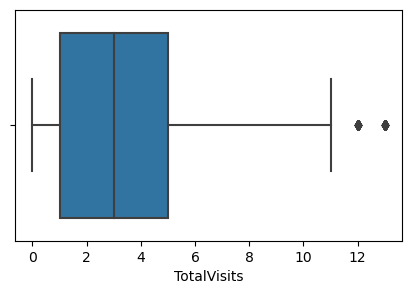

In [153]:
plt.figure(figsize=[5,3])
sns.boxplot(leads_df.TotalVisits);

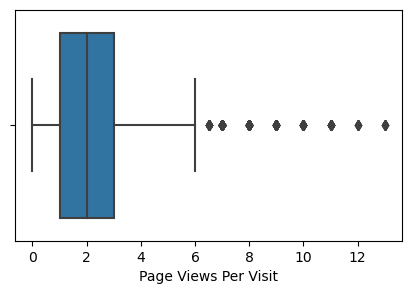

In [154]:
plt.figure(figsize=[5,3])
sns.boxplot(leads_df['Page Views Per Visit']);

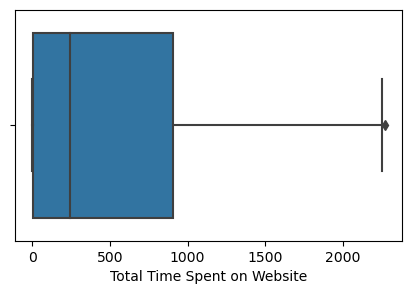

In [155]:
plt.figure(figsize=[5,3])
sns.boxplot(leads_df['Total Time Spent on Website']);

#### plotting correlation matrix

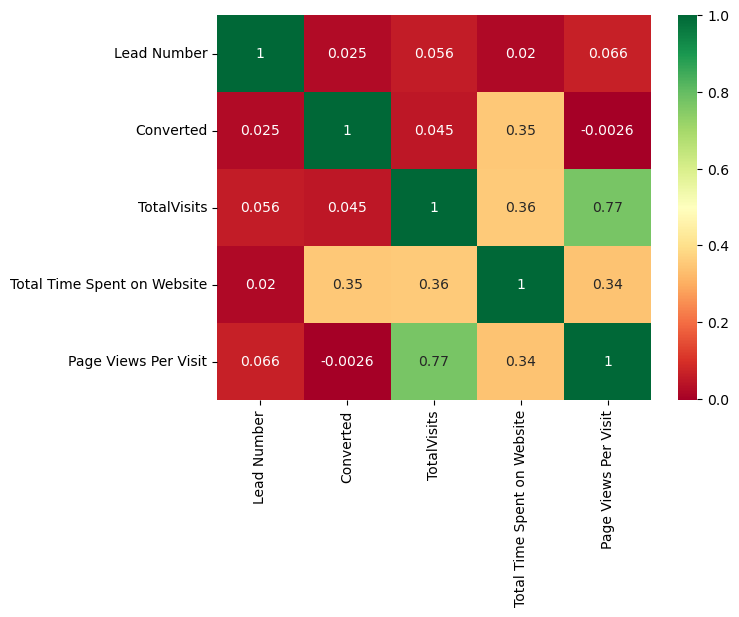

In [52]:
sns.heatmap(leads_df.corr(), annot=True, cmap='RdYlGn');

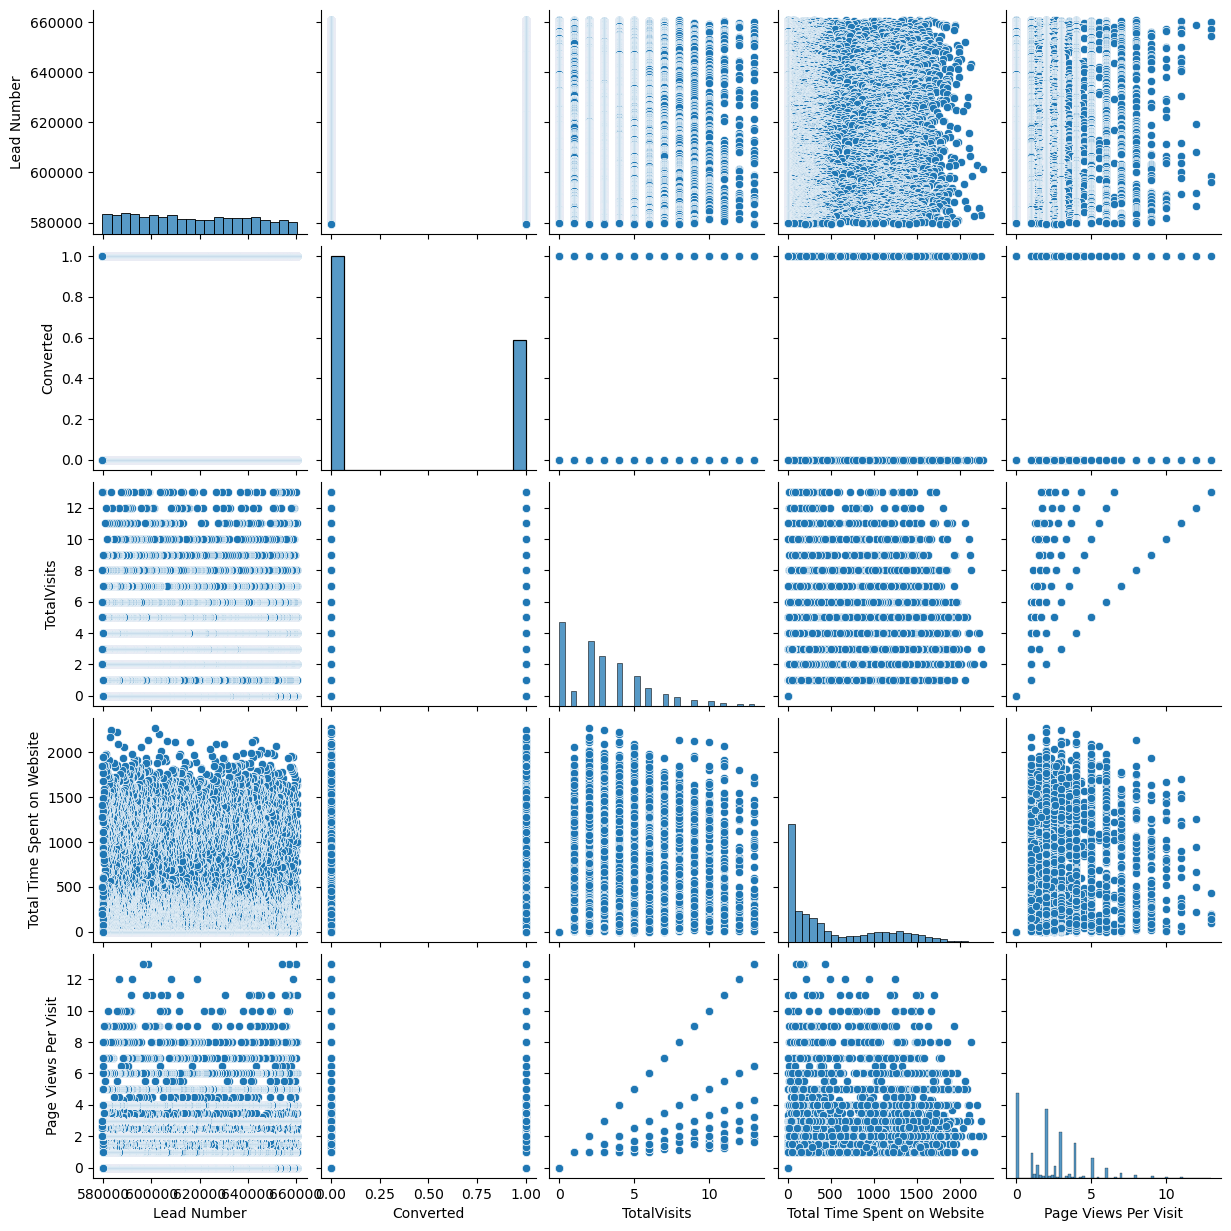

In [53]:
sns.pairplot(leads_df)
plt.show()

In [54]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8929 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             8929 non-null   int64  
 1   Lead Origin                             8929 non-null   object 
 2   Lead Source                             8929 non-null   object 
 3   Do Not Email                            8929 non-null   object 
 4   Converted                               8929 non-null   int64  
 5   TotalVisits                             8929 non-null   float64
 6   Total Time Spent on Website             8929 non-null   int64  
 7   Page Views Per Visit                    8929 non-null   float64
 8   Last Activity                           8929 non-null   object 
 9   Specialization                          8929 non-null   object 
 10  What is your current occupation         8929 non-null   obje

#### Creating dummy variables for categorical variables

In [55]:
categorical_values = leads_df.select_dtypes(include=['object']).columns
categorical_values

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [56]:
dummy = pd.get_dummies(leads_df[['Lead Origin','Lead Source','Do Not Email','Last Activity','Tags',
                                 'Specialization','What is your current occupation',
                                 'A free copy of Mastering The Interview','Last Notable Activity']],drop_first=True)

leads_df = pd.concat([leads_df,dummy],1)
leads_df.shape

(8929, 110)

In [57]:
leads_df.drop(categorical_values,1,inplace = True)
leads_df.shape

(8929, 101)

In [58]:
leads_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Not Specified,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,...,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not Specified,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Specialization_Business Studies,Specialization_E-COMMERCE,Specialization_Management Studies,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Dropping columns for values we imputed into categorical variables

In [59]:
leads_df.drop(['Specialization_Not Specified'],axis=1,inplace=True)
leads_df.drop(['What is your current occupation_Not Specified'],axis=1,inplace=True)
leads_df.drop(['Lead Source_Not Specified'],axis=1,inplace=True)
leads_df.drop(['Tags_Not Specified'],axis=1,inplace=True)
leads_df.shape

(8929, 97)

### Train-Test split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Putting feature variable to X
X = leads_df.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Specialization_Business Studies,Specialization_E-COMMERCE,Specialization_Management Studies,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [62]:
# Putting response variable to y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6250, 95)
(2679, 95)
(6250,)
(2679,)


### Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Specialization_Business Studies,Specialization_E-COMMERCE,Specialization_Management Studies,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7954,-0.029201,-0.620143,0.343801,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1544,1.063638,-0.363941,1.834249,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
558,-0.757760,1.512418,-0.649832,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6436,-1.122040,-0.874502,-1.146648,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
890,1.427918,2.373184,2.331065,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [66]:
### Checking the Converted Rate
converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
converted

37.91018031134505

### Model Building

In [67]:
import statsmodels.api as sm

In [68]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6163
Model Family:                Binomial   Df Model:                           86
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 25 Jul 2023   Deviance:                       43565.
Time:                        02:53:13   Pearson chi2:                 2.13e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   5.838e+15    7.5e+07   7.79e+07      0.000    5.84e+15    5.84e+15
TotalVisits                                              7.67e+13   1.47e+06   5.22e+07      0.000    7.67e+13    7.67e+13
Total Time Spent on Website                              2.03e+14   1.05e+06   1.94e+08      0.000    2.03e+14    2.03e+14
Page Views Per Visit                                   -4.999e+13   1.51e+06  -3.31e+07      0.000      -5e+13      -5e+13
Lead Origin_Landing Page Submission                     -9.04e+13   3.22e+06   -2.8e+07      0.000   -9.04e+13   -9.04e+13
Lead Origin_Lead Add Form                              -1.147e+15   3.22e+07  -3.56e+07      0.000   -1.15e+15   -1.15e+15
Lead Origin_Lead Import                                 1.153e+15   5.17e+07   2.23e+07      0.000    1.15e+15    1.15e+15
Lead Source_Direct Traffic                             -2.281e+15   3.33e+07  -6.85e+07      0.000   -2.28e+15   -2.28e+15
Lead Source_Facebook                                   -3.554e+15   5.17e+07  -6.87e+07      0.000   -3.55e+15   -3.55e+15
Lead Source_Google                                     -2.236e+15   3.33e+07  -6.72e+07      0.000   -2.24e+15   -2.24e+15
Lead Source_Live Chat                                   2.645e+15   4.95e+07   5.34e+07      0.000    2.64e+15    2.64e+15
Lead Source_NC_EDM                                       -19.4023   4.64e-07  -4.18e+07      0.000     -19.402     -19.402
Lead Source_Olark Chat                                 -1.955e+15   3.32e+07  -5.88e+07      0.000   -1.96e+15   -1.96e+15
Lead Source_Organic Search                             -2.229e+15   3.34e+07  -6.68e+07      0.000   -2.23e+15   -2.23e+15
Lead Source_Pay per Click Ads                          -7.545e+15    7.5e+07  -1.01e+08      0.000   -7.54e+15   -7.54e+15
Lead Source_Press_Release                              -3.619e+15   5.86e+07  -6.18e+07      0.000   -3.62e+15   -3.62e+15
Lead Source_Reference                                  -8.895e+14   1.47e+07  -6.06e+07      0.000   -8.89e+14   -8.89e+14
Lead Source_Referral Sites                             -2.209e+15   3.41e+07  -6.47e+07      0.000   -2.21e+15   -2.21e+15
Lead Source_Social Media                               -4.856e+15   7.54e+07  -6.44e+07      0.000   -4.86e+15   -4.86e+15
Lead Source_WeLearn                                     5.248e+13    7.5e+07      7e+05      0.000    5.25e+13    5.25e+13
Lead Source_Welingak Website                            -2.95e+14   1.59e+07  -1.86e+07      0.000   -2.95e+14   -2.95e+14
Lead Source_bing                                       -2.694e+15   4.73e+07  -5.69e+07      0.000   -2.69e+15   -2.69e+15
Lead Sou

#### Feature Selection Using RFE

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [70]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False,  True, False,
        True, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False])

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 41),
 ('Total Time Spent on Website', False, 9),
 ('Page Views Per Visit', False, 42),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', False, 7),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Source_Direct Traffic', False, 30),
 ('Lead Source_Facebook', False, 35),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Live Chat', False, 74),
 ('Lead Source_NC_EDM', False, 77),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 72),
 ('Lead Source_Press_Release', False, 57),
 ('Lead Source_Reference', False, 17),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Social Media', False, 73),
 ('Lead Source_WeLearn', False, 69),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 66),
 ('Lead Source_blog', False, 44),
 ('Lead Source_google', False, 37),
 ('Lead Source_testone', False, 76),
 ('Lead Source_welearnblog_Home', False,

In [73]:
## selected columns using RFE
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Modified'],
      dtype='object')

In [74]:
## rejected columns using RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Acti

#### Assessing the model with StatsModels

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1428.0
Date:                Tue, 25 Jul 2023   Deviance:                       2855.9
Time:                        02:53:16   Pearson chi2:                 9.81e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5833
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4802      0.070    -21.066      0.000      -1.618      -1.342
Lead Source_Welingak Website                 5.0015      1.034      4.837      0.000       2.975       7.028
Last Activity_SMS Sent                       2.3373      0.107     21.941      0.000       2.128       2.546
Tags_Closed by Horizzon                     28.0620   1.38e+04      0.002      0.998   -2.71e+04    2.72e+04
Tags_Diploma holder (Not Eligible)         -23.5029   2.93e+04     -0.001      0.999   -5.75e+04    5.75e+04
Tags_Interested in other courses            -1.5790      0.379     -4.169      0.000      -2.321      -0.837
Tags_Lost to EINS                            6.3427      0.599     10.588      0.000       5.169       7.517
Tags_Not doing further education            -2.7159      1.026     -2.647      0.008      -4.727      -0.705
Tags_Ringing                                -3.2142      0.215    -14.934      0.000      -3.636      -2.792
Tags_Will revert after reading the email     5.0743      0.190     26.776      0.000       4.703       5.446
Tags_invalid number                         -3.8892      1.024     -3.797      0.000      -5.897      -1.882
Tags_number not provided                   -25.5421   4.46e+04     -0.001      1.000   -8.74e+04    8.74e+04
Tags_opp hangup                             -1.5373      0.681     -2.257      0.024      -2.873      -0.202
Tags_switched off                           -4.4161      0.721     -6.124      0.000      -5.829      -3.003
Tags_wrong number given                    -25.4936   3.62e+04     -0.001      0.999   -7.11e+04     7.1e+04
Last Notable Activity_Modified              -1.7995      0.119    -15.143      0.000      -2.032      -1.567
============================================================================================================
"""

In [76]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Tags_Closed by Horizzon,1.05
0,Lead Source_Welingak Website,1.03
5,Tags_Lost to EINS,1.03
6,Tags_Not doing further education,1.03
12,Tags_switched off,1.03
3,Tags_Diploma holder (Not Eligible),1.01
9,Tags_invalid number,1.01
13,Tags_wrong number given,1.01
10,Tags_number not provided,1.00
11,Tags_opp hangup,1.00


##### There are no high VIF values but based on p-value we can drop 4 columns

In [78]:
col = col.drop('Tags_Closed by Horizzon')
col = col.drop('Tags_wrong number given')
col = col.drop('Tags_number not provided')
col = col.drop('Tags_Diploma holder (Not Eligible)')
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off',
       'Last Notable Activity_Modified'],
      dtype='object')

In [79]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6238
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1868.4
Date:                Tue, 25 Jul 2023   Deviance:                       3736.7
Time:                        02:53:16   Pearson chi2:                 6.99e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5203
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1426      0.060    -18.932      0.000      -1.261      -1.024
Lead Source_Welingak Website                 5.1061      1.016      5.026      0.000       3.115       7.097
Last Activity_SMS Sent                       1.7626      0.092     19.214      0.000       1.583       1.942
Tags_Interested in other courses            -2.0823      0.367     -5.680      0.000      -2.801      -1.364
Tags_Lost to EINS                            5.4212      0.592      9.162      0.000       4.262       6.581
Tags_Not doing further education            -3.1208      1.013     -3.081      0.002      -5.106      -1.136
Tags_Ringing                                -3.1145      0.209    -14.895      0.000      -3.524      -2.705
Tags_Will revert after reading the email     4.4880      0.178     25.243      0.000       4.140       4.836
Tags_invalid number                         -3.7691      1.019     -3.697      0.000      -5.767      -1.771
Tags_opp hangup                             -1.5276      0.654     -2.336      0.019      -2.809      -0.246
Tags_switched off                           -4.2721      0.718     -5.947      0.000      -5.680      -2.864
Last Notable Activity_Modified              -1.1030      0.092    -12.040      0.000      -1.283      -0.923
============================================================================================================
"""

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Lost to EINS,1.03
4,Tags_Not doing further education,1.03
9,Tags_switched off,1.03
0,Lead Source_Welingak Website,1.02
7,Tags_invalid number,1.01
8,Tags_opp hangup,1.00
2,Tags_Interested in other courses,0.28
6,Tags_Will revert after reading the email,0.11
10,Last Notable Activity_Modified,0.11
1,Last Activity_SMS Sent,0.08


In [81]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.24183759, 0.24183759, 0.09572346, 0.00464878, 0.01396514,
       0.98209976, 0.96595239, 0.24183759, 0.65020336, 0.01302231])

In [82]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number
0,0,0.241838,7954
1,0,0.241838,1544
2,0,0.095723,558
3,0,0.004649,6436
4,0,0.013965,890


In [83]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted
0,0,0.241838,7954,0
1,0,0.241838,1544,0
2,0,0.095723,558,0
3,0,0.004649,6436,0
4,0,0.013965,890,0


In [84]:
from sklearn import metrics

In [85]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3683,  164],
       [ 522, 1881]])

In [86]:
# Predicted     not_convert    convert
# Actual
# not_convert        3647      200
# convert            465       1938  

In [87]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.89024


In [88]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7827715355805244

In [90]:
# Let us calculate specificity
TN / float(TN+FP)

0.9573693787366779

In [91]:
# Calculate false postive rate - predicting convertes when customer does not convert
print(FP/ float(TN+FP))

0.042630621263322066


In [92]:
# positive predictive value 
print (TP / float(TP+FP))

0.9198044009779951


In [93]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8758620689655172


### Plotting the ROC Curve

In [94]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

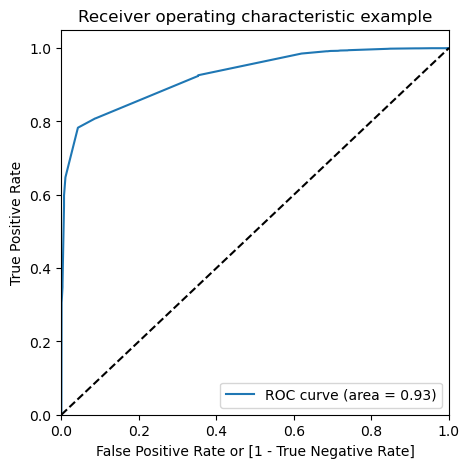

In [96]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

#### Finding Optimal Cutoff Point

In [97]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.241838,7954,0,1,1,1,0,0,0,0,0,0,0
1,0,0.241838,1544,0,1,1,1,0,0,0,0,0,0,0
2,0,0.095723,558,0,1,0,0,0,0,0,0,0,0,0
3,0,0.004649,6436,0,1,0,0,0,0,0,0,0,0,0
4,0,0.013965,890,0,1,0,0,0,0,0,0,0,0,0


In [98]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0   0.38448  1.000000  0.000000
0.1   0.1   0.75408  0.925926  0.646738
0.2   0.2   0.75360  0.923845  0.647258
0.3   0.3   0.87248  0.808156  0.912659
0.4   0.4   0.89024  0.782772  0.957369
0.5   0.5   0.89024  0.782772  0.957369
0.6   0.6   0.89024  0.782772  0.957369
0.7   0.7   0.85808  0.647524  0.989602
0.8   0.8   0.85808  0.647524  0.989602
0.9   0.9   0.85808  0.647524  0.989602


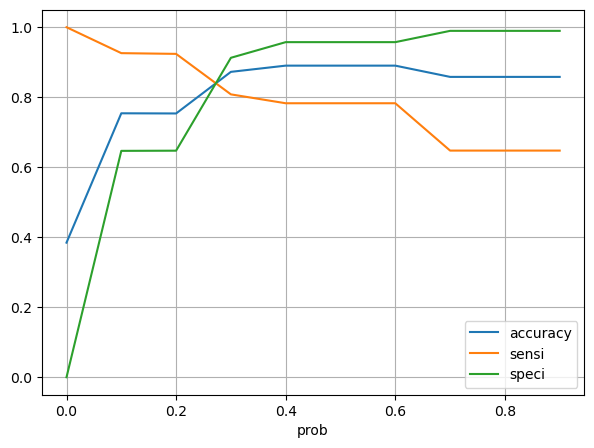

In [152]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

#### From the curve above, 0.27 is the optimum point to take it as a cutoff probability.

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.27 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.241838,7954,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.241838,1544,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.095723,558,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.004649,6436,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.013965,890,0,1,0,0,0,0,0,0,0,0,0,0


In [101]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.87168

In [102]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3505,  342],
       [ 460, 1943]])

In [103]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8085726175613817

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.9110995580972187

In [106]:
# Calculate false postive rate - predicting convertes when customer does not convert
print(FP/ float(TN+FP))

0.08890044190278139


In [107]:
# positive predictive value 
print (TP / float(TP+FP))

0.8503282275711159


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8839848675914249


### Precision and Recall

In [109]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion3

array([[3683,  164],
       [ 522, 1881]])

In [110]:
#Precision
#TP / TP + FP
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.9198044009779951

In [111]:
#Recall
#TP / TP + FN
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.7827715355805244

In [112]:
from sklearn.metrics import precision_score, recall_score

In [113]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9198044009779951

In [114]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7827715355805244

#### Precision and recall tradeoff

In [115]:
from sklearn.metrics import precision_recall_curve

In [116]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6245    1
 6246    0
 6247    0
 6248    0
 6249    0
 Name: Converted, Length: 6250, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6245    1
 6246    0
 6247    0
 6248    0
 6249    0
 Name: predicted, Length: 6250, dtype: int64)

In [117]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

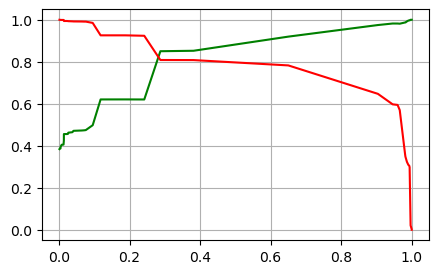

In [150]:
plt.figure(figsize=[5,3])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid()
plt.show()

### Making predictions on the test set

In [119]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [120]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,Last Notable Activity_Modified
8707,0,0,0,0,0,1,0,0,0,0,0
5299,0,1,0,0,0,0,0,0,0,0,0
3565,0,0,0,0,1,0,0,0,0,0,0
2905,0,0,0,0,0,1,0,0,0,0,0
6669,0,0,0,0,0,0,0,0,0,0,1


In [121]:
X_test_sm = sm.add_constant(X_test)

In [122]:
y_test_pred = res.predict(X_test_sm)

In [123]:
y_test_pred[:10]

8707    0.013965
5299    0.650203
3565    0.013878
2905    0.013965
6669    0.095723
4357    0.241838
6089    0.076240
1473    0.965952
5515    0.650203
3961    0.241838
dtype: float64

In [124]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
8707,0.013965
5299,0.650203
3565,0.013878
2905,0.013965
6669,0.095723


In [125]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [126]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [127]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,0,8707,0.013965
1,0,5299,0.650203
2,0,3565,0.013878
3,0,2905,0.013965
4,0,6669,0.095723


In [129]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [130]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Convert_Prob'], axis=1)
y_pred_final.head()

,Lead Number,Converted,Convert_Prob
0,8707,0,0.013965
1,5299,0,0.650203
2,3565,0,0.013878
3,2905,0,0.013965
4,6669,0,0.095723


In [131]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)
y_pred_final.head()

,Lead Number,Converted,Convert_Prob,final_predicted
0,8707,0,0.013965,0
1,5299,0,0.650203,1
2,3565,0,0.013878,0
3,2905,0,0.013965,0
4,6669,0,0.095723,0


In [132]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8771929824561403

In [133]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[1541,  156],
       [ 173,  809]])

In [134]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8238289205702648

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.9080730701237478

In [156]:
#Precision
#TP / TP + FP
confusion4[1,1]/(confusion4[0,1]+confusion4[1,1])

0.8383419689119171

In [157]:
#Recall
#TP / TP + FN
confusion4[1,1]/(confusion4[1,0]+confusion4[1,1])

0.8238289205702648

## Final Observation

### Train data:

#### Accuracy: 87.17%, Sensitivity: 80.86% Specificity: 91.11%

### Test data:

#### Accuracy: 87.71%, Sensitivity: 82.38%, Specificity: 90.81%

### Analysis for Subjective questions

In [137]:
leads_df_1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Studies,Student,Will revert after reading the email,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,No,Modified


In [138]:
leads_df_1["TotalVisits_cat"]=pd.cut(leads_df_1.TotalVisits,bins=[0,5,10,15,20,999],labels=['0-5','5-10','10-15','15-20','+20'])
leads_df_1["TotalVisits_cat"].value_counts(normalize= True)*100

0-5      76.424646
5-10     18.469771
10-15     3.369974
15-20     1.055829
+20       0.679780
Name: TotalVisits_cat, dtype: float64

In [139]:
leads_df_1["Page Views Per Visit_cat"]=pd.cut(leads_df_1['Page Views Per Visit'],bins=[0,2,4,6,8,99],labels=['0-2','2-4','4-6','6-8','+10'])
leads_df_1["Page Views Per Visit_cat"].value_counts(normalize= True)*100

0-2    43.491467
2-4    38.993347
4-6    12.308360
6-8     3.427828
+10     1.778999
Name: Page Views Per Visit_cat, dtype: float64

In [140]:
leads_df_1["Total Time Spent on Website_cat"]=pd.cut(leads_df_1['Total Time Spent on Website'],bins=[0,100,250,500,750,1000,1500,2000,9999],labels=['0-100','100-250','250-500','500-750','750-1k','1k-1.5k','1.5k-2k','+2k'])
leads_df_1["Total Time Spent on Website_cat"].value_counts(normalize= True)*100

1k-1.5k    21.447178
250-500    20.463097
100-250    19.710564
0-100      15.311143
750-1k      8.234443
1.5k-2k     8.002894
500-750     6.541245
+2k         0.289436
Name: Total Time Spent on Website_cat, dtype: float64

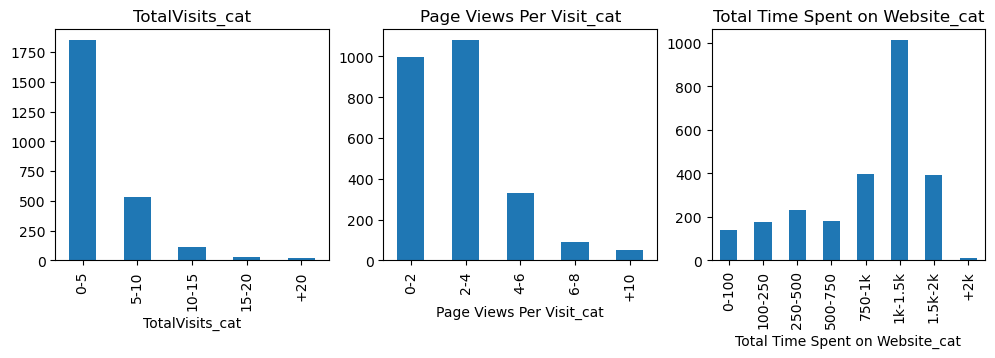

In [141]:
plt.figure(figsize=[12,3])
plt.subplot(1, 3, 1)
plt.title('TotalVisits_cat')
leads_df_1.groupby(['TotalVisits_cat'])['Converted'].sum().plot.bar()
plt.subplot(1, 3, 2)
plt.title('Page Views Per Visit_cat')
leads_df_1.groupby(['Page Views Per Visit_cat'])['Converted'].sum().plot.bar()
plt.subplot(1, 3, 3)
plt.title('Total Time Spent on Website_cat')
leads_df_1.groupby(['Total Time Spent on Website_cat'])['Converted'].sum().plot.bar();

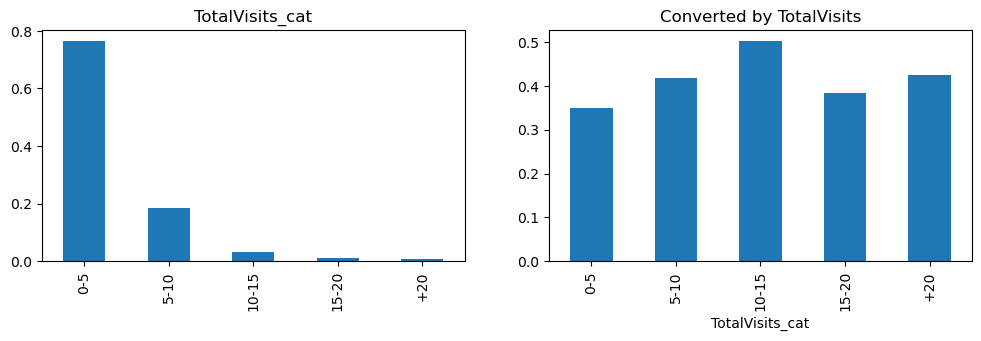

In [142]:
plt.figure(figsize=[12,3])
plt.subplot(1, 2, 1)
plt.title('TotalVisits_cat')
leads_df_1.TotalVisits_cat.value_counts(normalize= True).plot.bar()
plt.subplot(1, 2, 2)
plt.title('Converted by TotalVisits')
leads_df_1.groupby(['TotalVisits_cat'])['Converted'].mean().plot.bar();

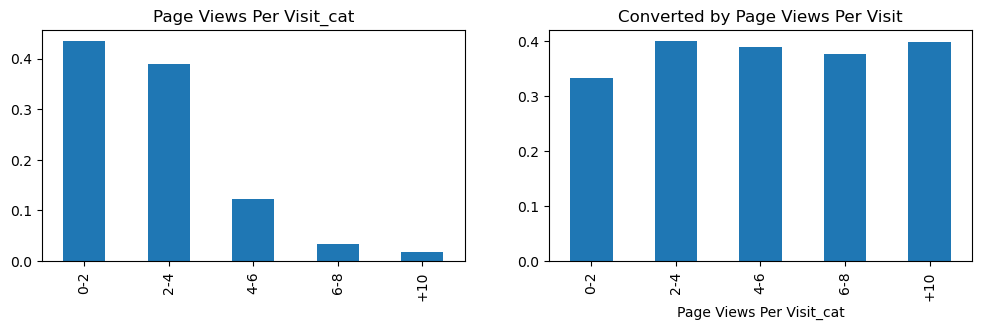

In [143]:
plt.figure(figsize=[12,3])
plt.subplot(1, 2, 1)
plt.title('Page Views Per Visit_cat')
leads_df_1['Page Views Per Visit_cat'].value_counts(normalize= True).plot.bar()
plt.subplot(1, 2, 2)
plt.title('Converted by Page Views Per Visit')
leads_df_1.groupby(['Page Views Per Visit_cat'])['Converted'].mean().plot.bar();

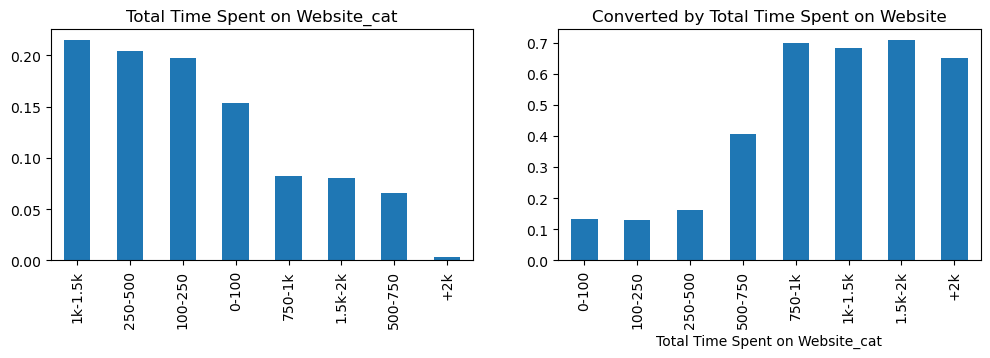

In [144]:
plt.figure(figsize=[12,3])
plt.subplot(1, 2, 1)
plt.title('Total Time Spent on Website_cat')
leads_df_1['Total Time Spent on Website_cat'].value_counts(normalize= True).plot.bar()
plt.subplot(1, 2, 2)
plt.title('Converted by Total Time Spent on Website')
leads_df_1.groupby(['Total Time Spent on Website_cat'])['Converted'].mean().plot.bar();

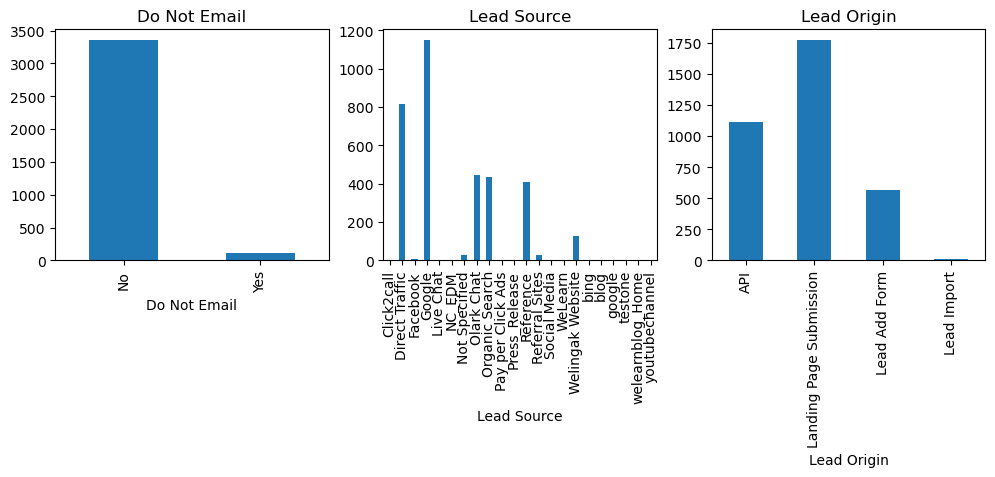

In [145]:
plt.figure(figsize=[12,3])
plt.subplot(1, 3, 1)
plt.title('Do Not Email')
leads_df_1.groupby(['Do Not Email'])['Converted'].sum().plot.bar()
plt.subplot(1, 3, 2)
plt.title('Lead Source')
leads_df_1.groupby(['Lead Source'])['Converted'].sum().plot.bar()
plt.subplot(1, 3, 3)
plt.title('Lead Origin')
leads_df_1.groupby(['Lead Origin'])['Converted'].sum().plot.bar();

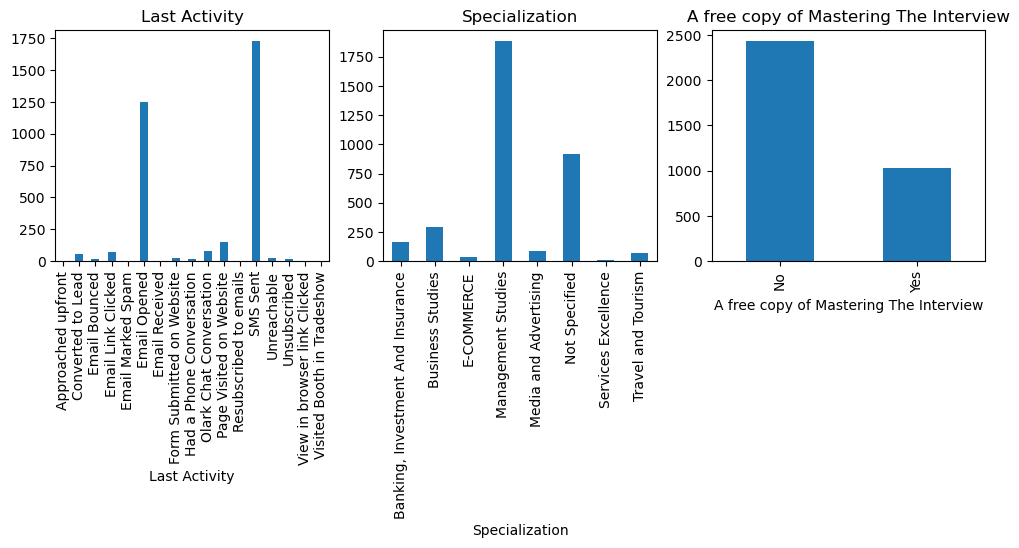

In [146]:
plt.figure(figsize=[12,3])
plt.subplot(1, 3, 1)
plt.title('Last Activity')
leads_df_1.groupby(['Last Activity'])['Converted'].sum().plot.bar()
plt.subplot(1, 3, 2)
plt.title('Specialization')
leads_df_1.groupby(['Specialization'])['Converted'].sum().plot.bar()
plt.subplot(1, 3, 3)
plt.title('A free copy of Mastering The Interview')
leads_df_1.groupby(['A free copy of Mastering The Interview'])['Converted'].sum().plot.bar();

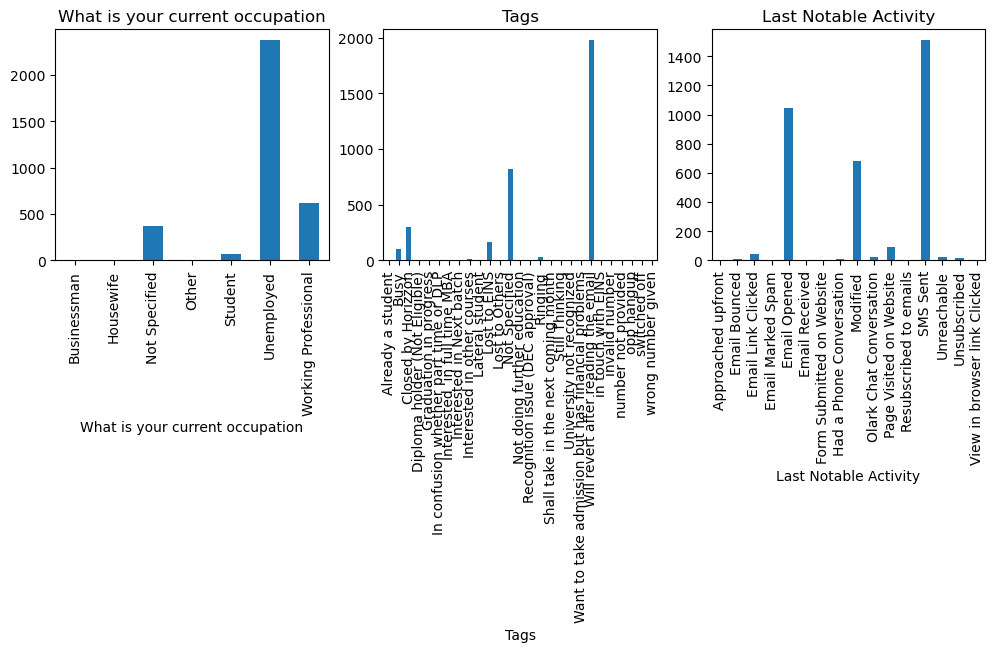

In [147]:
plt.figure(figsize=[12,3])
plt.subplot(1, 3, 1)
plt.title('What is your current occupation')
leads_df_1.groupby(['What is your current occupation'])['Converted'].sum().plot.bar()
plt.subplot(1, 3, 2)
plt.title('Tags')
leads_df_1.groupby(['Tags'])['Converted'].sum().plot.bar()
plt.subplot(1, 3, 3)
plt.title('Last Notable Activity')
leads_df_1.groupby(['Last Notable Activity'])['Converted'].sum().plot.bar();